In [1]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 
from pmdarima import auto_arima                        
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Data Preprocessing
from pandas import read_csv
from datetime import datetime

def str2time(time_str):
    return datetime.strptime(time_str, '%Y %m %d %H')

def str3time(time_str):
    return datetime.strptime(time_str, '%Y %m')

In [3]:
## combine year, month, day, hour into datetime
Beijing = pd.read_csv("D:/Math546 Time series/final projects/PM2.5 Data of Five Chinese Cities Data Set/BeijingPM20100101_20151231.csv", parse_dates=[['year', 'month', 'day', 'hour']], index_col=0, date_parser=str2time)

In [4]:
dataset = pd.read_csv("D:/Math546 Time series/final projects/PM2.5 Data of Five Chinese Cities Data Set/BeijingPM20100101_20151231.csv", parse_dates=[['year', 'month']], index_col=0, date_parser=str3time)

dataset.dropna(axis=0,subset = ["PM_US Post"], how="any",inplace=True)
dataset.groupby(['year_month']).size().tail(48)

year_month
2012-01-01    670
2012-02-01    690
2012-03-01    740
2012-04-01    719
2012-05-01    691
2012-06-01    708
2012-07-01    688
2012-08-01    623
2012-09-01    712
2012-10-01    740
2012-11-01    698
2012-12-01    614
2013-01-01    739
2013-02-01    671
2013-03-01    739
2013-04-01    715
2013-05-01    727
2013-06-01    718
2013-07-01    737
2013-08-01    735
2013-09-01    717
2013-10-01    738
2013-11-01    718
2013-12-01    724
2014-01-01    737
2014-02-01    669
2014-03-01    743
2014-04-01    717
2014-05-01    742
2014-06-01    703
2014-07-01    737
2014-08-01    733
2014-09-01    715
2014-10-01    743
2014-11-01    706
2014-12-01    716
2015-01-01    739
2015-02-01    666
2015-03-01    712
2015-04-01    711
2015-05-01    740
2015-06-01    702
2015-07-01    742
2015-08-01    743
2015-09-01    717
2015-10-01    717
2015-11-01    720
2015-12-01    722
dtype: int64

In [5]:
#Delet non-useful data
Beijing.drop(['PM_Dongsi', 'PM_Dongsihuan','cbwd', 'PM_Nongzhanguan', 'season', 'precipitation', 'Iprec','No', 'DEWP', 'HUMI', 'PRES', 'TEMP', 'Iws', 'DEWP', 'HUMI', 'PRES', 'TEMP', 'Iws'], 
               axis=1,
              inplace=True)

In [6]:
## rename columns
Beijing.index.name = 'date'

In [7]:
Beijing.dropna(axis=0, how="any",inplace=True)

In [8]:
Beijing.index = pd.to_datetime(Beijing.index, 
                             format='%d-%m-%Y %H:%M:%S')
Beijing = Beijing.set_index(Beijing.index).asfreq('H')
#print(by_hour.index)

In [9]:
df = Beijing[(Beijing.index >=pd.to_datetime('20130819000000')) & (Beijing.index <= pd.to_datetime('20130902230000'))]

In [10]:
len(df)

360

In [11]:
df = df.set_index(df.index).asfreq('H')

df = df.fillna(method='ffill')
len(df)

360

In [12]:
##sARIMA Forecast

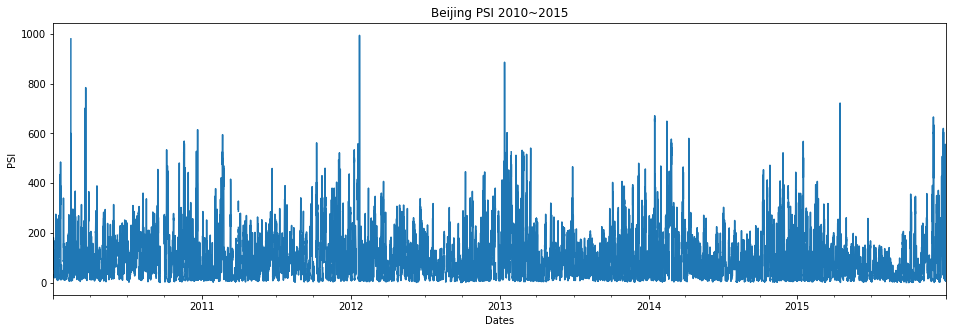

In [13]:
ax = Beijing['PM_US Post'].plot(figsize = (16,5), title = "Beijing PSI 2010~2015")
ax.set(xlabel='Dates', ylabel='PSI');

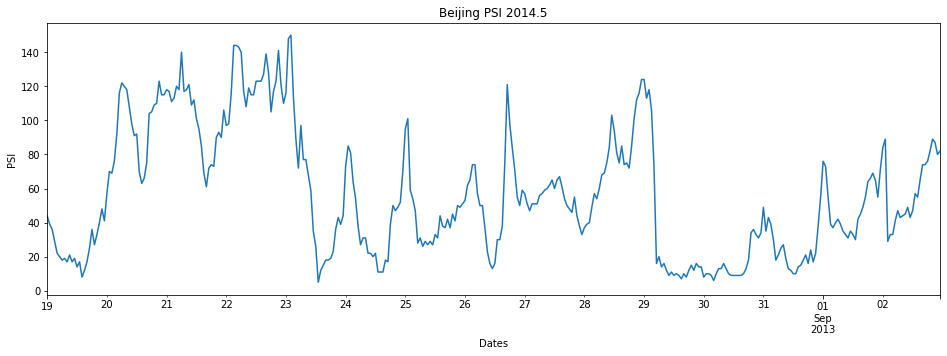

In [14]:
ax = df['PM_US Post'].plot(figsize = (16,5), title = "Beijing PSI 2014.5")
ax.set(xlabel='Dates', ylabel='PSI');

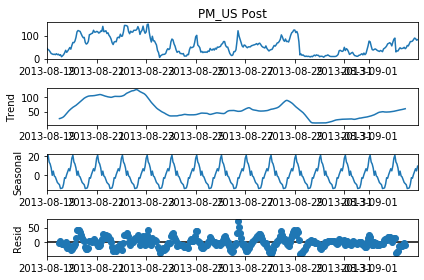

In [15]:
a = seasonal_decompose(df["PM_US Post"], model = "add")
a.plot();

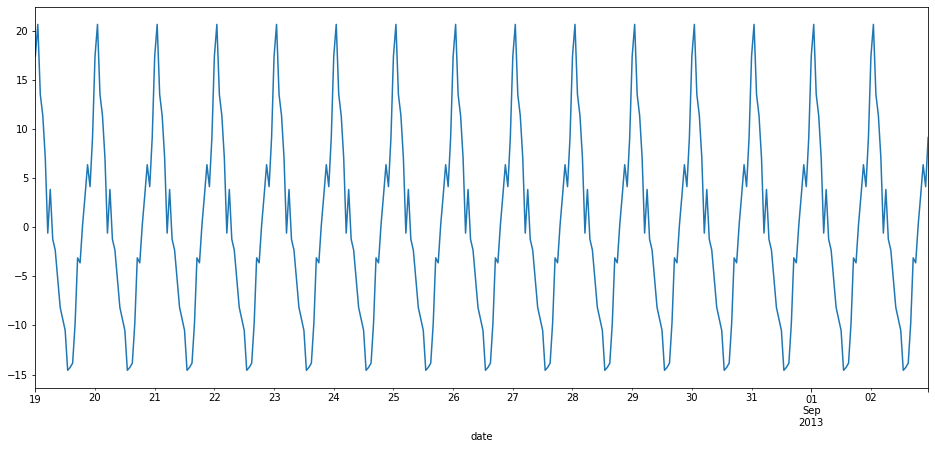

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize = (16,7))
a.seasonal.plot();
# Show weakly data

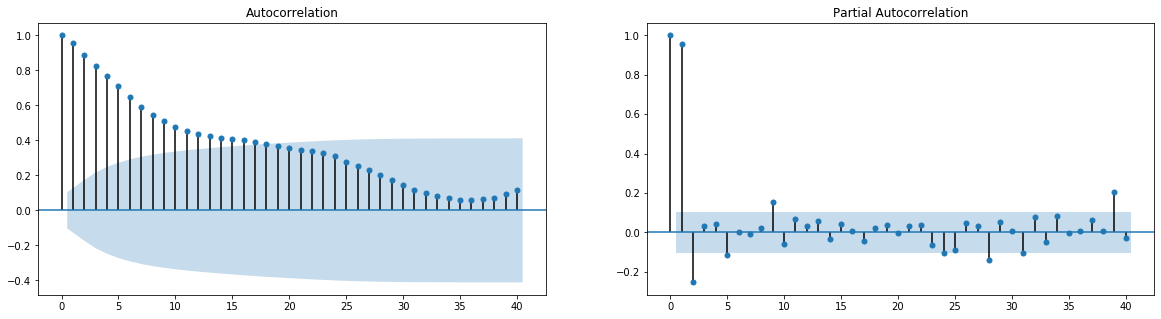

In [17]:
fig, axes = plt.subplots(1,2, figsize=(20,5))
plot_acf(df['PM_US Post'], lags=40, ax=axes[0], fft=False)
plot_pacf(df['PM_US Post'], lags=40, ax=axes[1])
plt.show()

In [18]:
import statsmodels.api as sm

res = sm.tsa.stattools.arma_order_select_ic(df['PM_US Post'], ic=['aic']) 
print (res.aic_min_order)

(4, 2)


In [19]:
#auto_arima() function to get best p,d,q,P,D,Q values
auto_arima(df['PM_US Post'], start_p = 0, start_q = 0, 
                          max_p = 5, max_q = 3, m=24,
                          start_P = 0, 
                          d = None, D = 1, trace = True, 
                          error_action ='ignore',   # we don't want to know if an order does not work 
                          suppress_warnings = True,  # we don't want convergence warnings 
                          stepwise = True).summary()

Performing stepwise search to minimize aic
Fit ARIMA: (0, 0, 0)x(0, 1, 1, 24) (constant=True); AIC=3404.002, BIC=3415.454, Time=3.633 seconds
Fit ARIMA: (0, 0, 0)x(0, 1, 0, 24) (constant=True); AIC=3495.122, BIC=3502.757, Time=0.113 seconds
Fit ARIMA: (1, 0, 0)x(1, 1, 0, 24) (constant=True); AIC=2691.039, BIC=2706.308, Time=2.561 seconds
Fit ARIMA: (0, 0, 1)x(0, 1, 1, 24) (constant=True); AIC=3058.299, BIC=3073.567, Time=6.851 seconds
Near non-invertible roots for order (0, 0, 1)(0, 1, 1, 24); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: (0, 0, 0)x(0, 1, 0, 24) (constant=False); AIC=3494.194, BIC=3498.011, Time=0.057 seconds
Fit ARIMA: (1, 0, 0)x(0, 1, 0, 24) (constant=True); AIC=2758.080, BIC=2769.531, Time=0.346 seconds
Fit ARIMA: (1, 0, 0)x(2, 1, 0, 24) (constant=True); AIC=2671.175, BIC=2690.261, Time=6.742 seconds
Fit ARIMA: (1, 0, 0)x(2, 1, 1, 24) (constant=True); AIC=2615.831, BIC=2638.734, Time=30.117 seconds
Near

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  360
Model:             SARIMAX(2, 0, 0)x(1, 1, [1], 24)   Log Likelihood               -1293.200
Date:                              Sat, 25 Apr 2020   AIC                           2598.400
Time:                                      12:30:20   BIC                           2621.303
Sample:                                           0   HQIC                          2607.530
                                              - 360                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0949      0.135     -0.701      0.483      -0.360       0.171
ar.L1          1.1711      0.039     30.020      0.000       1.095       1.248
ar.L2         -0.2288      0.041     -5.566      0.000      -0.309      -0.148
ar.S.L24       0.0698      0.076      0.917      0.359      -0.079       0.219
ma.S.L24      -0.9997     34.668     -0.029      0.977     -68.948      66.949
sigma2       106.6272   3690.974      0.029      0.977   -7127.548    7340.803
===================================================================================
Ljung-Box (Q):                       46.09   Jarque-Bera (JB):               170.57
Prob(Q):                              0.23   Prob(JB):                         0.00
Heteroskedasticity (H):               0.55   Skew:                            -0.63
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [20]:
# the best arima model chosen by auto_arima() is SARIMAX(2, 0, 0)x(1, 1, [1], 24)

# split the data into train and test set
train_data = df[:len(df)-72]
test_data = df[len(df)-72:]
arima_model = SARIMAX(train_data['PM_US Post'], order = (2, 0, 0), seasonal_order = (1, 1, [1], 24))
arima_result = arima_model.fit()
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                           PM_US Post   No. Observations:                  288
Model:             SARIMAX(2, 0, 0)x(1, 1, [1], 24)   Log Likelihood               -1025.554
Date:                              Sat, 25 Apr 2020   AIC                           2061.108
Time:                                      12:30:28   BIC                           2078.988
Sample:                                  08-19-2013   HQIC                          2068.293
                                       - 08-30-2013                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2170      0.046     26.593      0.000       1.127       1.307
ar.L2         -0.2658      0.049     -5.457      0.000      -0.361      -0.170
ar.S.L24       0.0440      0.087      0.505      0.614      -0.127       0.215
ma.S.L24      -0.9994     23.246     -0.043      0.966     -46.560      44.561
sigma2       110.4545   2560.903      0.043      0.966   -4908.823    5129.732
===================================================================================
Ljung-Box (Q):                       48.16   Jarque-Bera (JB):                31.63
Prob(Q):                              0.18   Prob(JB):                         0.00
Heteroskedasticity (H):               0.58   Skew:                            -0.30
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [21]:
arima_pred = arima_result.predict(start = len(train_data), end = len(df)-1, typ="levels").rename("ARIMA Predictions")
arima_pred

2013-08-31 00:00:00    40.806679
2013-08-31 01:00:00    46.928226
2013-08-31 02:00:00    46.225034
2013-08-31 03:00:00    46.315351
2013-08-31 04:00:00    43.434087
                         ...    
2013-09-02 19:00:00    56.039807
2013-09-02 20:00:00    59.909472
2013-09-02 21:00:00    63.498849
2013-09-02 22:00:00    60.455053
2013-09-02 23:00:00    63.436466
Freq: H, Name: ARIMA Predictions, Length: 72, dtype: float64

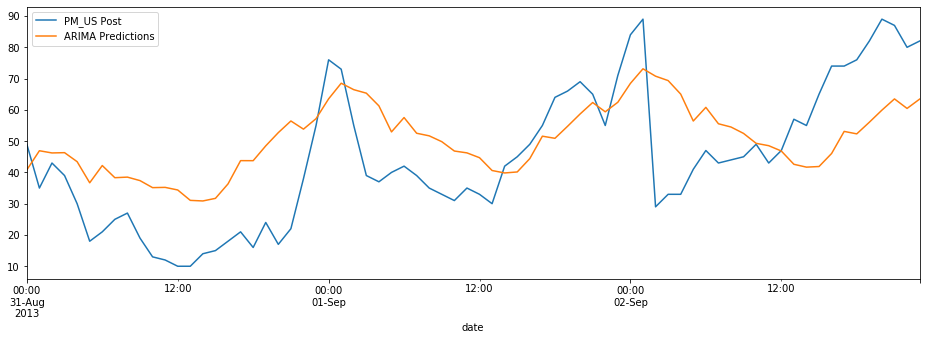

In [22]:
test_data['PM_US Post'].plot(figsize = (16,5), legend=True)
arima_pred.plot(legend = True);

In [23]:
arima_rmse_error = rmse(test_data['PM_US Post'], arima_pred)
arima_mse_error = arima_rmse_error**2
mean_value = df['PM_US Post'].mean()

print(f'MSE Error: {arima_mse_error}\nRMSE Error: {arima_rmse_error}\nMean: {mean_value}')

MSE Error: 337.1256986628278
RMSE Error: 18.36098305273516
Mean: 56.76111111111111


In [24]:
test_data['ARIMA_Predictions'] = arima_pred

In [25]:
################################################################################################################################

In [26]:
##LSTM Forecast

In [27]:
################################################################################################################################

In [28]:
#df

In [29]:
# Scale train and test data with MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_data)
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

In [30]:
# Before creating LSTM model, create a Time Series Generator object.
from keras.preprocessing.sequence import TimeseriesGenerator

n_input = 1
n_features= 1
generator = TimeseriesGenerator(scaled_train_data, scaled_train_data, length=n_input, batch_size=1)
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='relu', input_shape=(n_input, n_features)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

lstm_model.summary()

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50)                10400     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [31]:
lstm_model.fit_generator(generator,epochs=50)

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
287/287 [==============================] - 1s 3ms/step - loss: 0.0758
Epoch 2/50
287/287 [==============================] - 1s 2ms/step - loss: 0.0201
Epoch 3/50
287/287 [==============================] - 1s 2ms/step - loss: 0.0105
Epoch 4/50
287/287 [==============================] - 1s 2ms/step - loss: 0.0072
Epoch 5/50
287/287 [==============================] - 0s 2ms/step - loss: 0.0066
Epoch 6/50
287/287 [==============================] - 0s 2ms/step - loss: 0.0065
Epoch 7/50
287/287 [==============================] - 0s 2ms/step - loss: 0.0066
Epoch 8/50
287/287 [==============================] - 1s 2ms/step - loss: 0.0069
Epoch 9/50
287/287 [==============================] - 0s 2ms/step - loss: 0.0066
Epoch 10/50
287/287 [==============================] - 1s 2ms/step - loss: 0.0068
Epoch 11/50
287/287 [==============================] - 1s 2ms/step - loss: 0.0066
Epoch 12/50
287/287 [==============================] - 1s 2

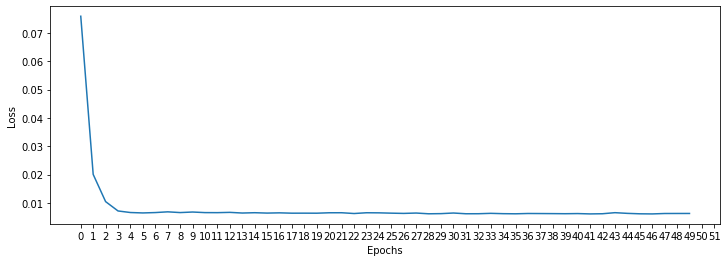

In [32]:
losses_lstm = lstm_model.history.history['loss']
plt.figure(figsize=(12,4))
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(np.arange(0,170,1))
plt.plot(range(len(losses_lstm)),losses_lstm);

In [33]:
lstm_predictions_scaled = list()

batch = scaled_train_data[-n_input:]
current_batch = batch.reshape((1, n_input, n_features))

for i in range(len(test_data)):   
    lstm_pred = lstm_model.predict(current_batch)[0]
    lstm_predictions_scaled.append(lstm_pred) 
    current_batch = np.append(current_batch[:,1:,:],[[lstm_pred]],axis=1)

In [34]:
lstm_predictions_scaled

[array([0.2132491], dtype=float32),
 array([0.22616644], dtype=float32),
 array([0.23878115], dtype=float32),
 array([0.25112012], dtype=float32),
 array([0.26320824], dtype=float32),
 array([0.27506873], dtype=float32),
 array([0.28672335], dtype=float32),
 array([0.2981924], dtype=float32),
 array([0.30949512], dtype=float32),
 array([0.32064968], dtype=float32),
 array([0.33167335], dtype=float32),
 array([0.34258264], dtype=float32),
 array([0.3533934], dtype=float32),
 array([0.36412084], dtype=float32),
 array([0.37477973], dtype=float32),
 array([0.38538447], dtype=float32),
 array([0.395949], dtype=float32),
 array([0.4064872], dtype=float32),
 array([0.4170127], dtype=float32),
 array([0.42753902], dtype=float32),
 array([0.43807966], dtype=float32),
 array([0.44864812], dtype=float32),
 array([0.45925808], dtype=float32),
 array([0.4699234], dtype=float32),
 array([0.4806582], dtype=float32),
 array([0.49147683], dtype=float32),
 array([0.50197124], dtype=float32),
 array([0.

In [35]:
lstm_predictions = scaler.inverse_transform(lstm_predictions_scaled)
lstm_predictions

array([[35.92111982],
       [37.7941341 ],
       [39.62326735],
       [41.41241744],
       [43.16519484],
       [44.88496587],
       [46.5748851 ],
       [48.23789969],
       [49.87679258],
       [51.4942041 ],
       [53.09263632],
       [54.67448324],
       [56.24204382],
       [57.79752195],
       [59.343061  ],
       [60.88074818],
       [62.41260588],
       [63.94064352],
       [65.46684027],
       [66.99315801],
       [68.52155   ],
       [70.05397812],
       [71.59242153],
       [73.13889399],
       [74.69543949],
       [76.2641409 ],
       [77.7858305 ],
       [79.22873348],
       [80.59590071],
       [81.85671121],
       [83.02025706],
       [84.0947488 ],
       [85.08760184],
       [86.00554019],
       [86.85464829],
       [87.64044881],
       [88.36799771],
       [89.04189289],
       [89.6663174 ],
       [90.24509132],
       [90.78172356],
       [91.27944648],
       [91.74120724],
       [92.16971964],
       [92.56745547],
       [92

In [36]:
test_data['LSTM_Predictions'] = lstm_predictions
test_data

,PM_US Post,ARIMA_Predictions,LSTM_Predictions
date,,,
2013-08-31 00:00:00,49.0,40.806679,35.921120
2013-08-31 01:00:00,35.0,46.928226,37.794134
2013-08-31 02:00:00,43.0,46.225034,39.623267
2013-08-31 03:00:00,39.0,46.315351,41.412417
2013-08-31 04:00:00,30.0,43.434087,43.165195
...,...,...,...
2013-09-02 19:00:00,82.0,56.039807,96.825718
2013-09-02 20:00:00,89.0,59.909472,96.895006
2013-09-02 21:00:00,87.0,63.498849,96.959489


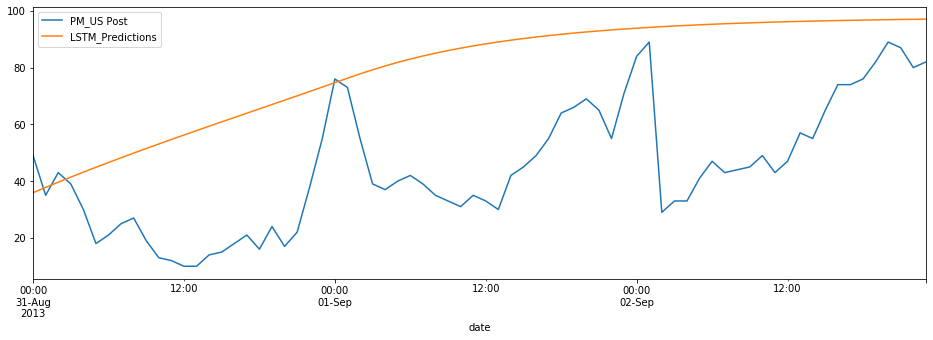

In [37]:
test_data['PM_US Post'].plot(figsize = (16,5), legend=True)
test_data['LSTM_Predictions'].plot(legend = True);

In [38]:
lstm_rmse_error = rmse(test_data['PM_US Post'], test_data["LSTM_Predictions"])
lstm_mse_error = lstm_rmse_error**2
mean_value = df['PM_US Post'].mean()

print(f'MSE Error: {lstm_mse_error}\nRMSE Error: {lstm_rmse_error}\nMean: {mean_value}')

MSE Error: 1516.100343914402
RMSE Error: 38.93713322670792
Mean: 56.76111111111111


In [39]:
################################################################################################################################

In [40]:
##Prophet Forecast

In [41]:
################################################################################################################################

In [42]:
df_pr = df.copy()
df_pr = df.reset_index()
df_pr.columns = ['ds','y'] # To use prophet column names should be like that
train_data_pr = df_pr.iloc[:len(df)-72]
test_data_pr = df_pr.iloc[len(df)-72:]

from fbprophet import Prophet
m = Prophet()

m.fit(train_data_pr)
future = m.make_future_dataframe(periods=72,freq='H')
prophet_pred = m.predict(future)
prophet_pred

Importing plotly failed. Interactive plots will not work.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-08-19 00:00:00,78.376139,49.052729,135.874957,78.376139,78.376139,12.510188,12.510188,12.510188,12.510188,12.510188,12.510188,0.0,0.0,0.0,90.886327
1,2013-08-19 01:00:00,78.342638,50.677549,135.782557,78.342638,78.342638,14.653593,14.653593,14.653593,14.653593,14.653593,14.653593,0.0,0.0,0.0,92.996231
2,2013-08-19 02:00:00,78.309137,48.895553,136.221502,78.309137,78.309137,14.416975,14.416975,14.416975,14.416975,14.416975,14.416975,0.0,0.0,0.0,92.726111
3,2013-08-19 03:00:00,78.275635,45.276100,133.766754,78.275635,78.275635,11.601001,11.601001,11.601001,11.601001,11.601001,11.601001,0.0,0.0,0.0,89.876637
4,2013-08-19 04:00:00,78.242134,40.304063,129.400048,78.242134,78.242134,7.348566,7.348566,7.348566,7.348566,7.348566,7.348566,0.0,0.0,0.0,85.590700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,2013-09-02 19:00:00,17.900000,-21.783861,62.927252,16.788269,18.923425,2.210536,2.210536,2.210536,2.210536,2.210536,2.210536,0.0,0.0,0.0,20.110536
356,2013-09-02 20:00:00,17.693637,-22.941272,63.892423,16.552214,18.751316,4.240308,4.240308,4.240308,4.240308,4.240308,4.240308,0.0,0.0,0.0,21.933946
357,2013-09-02 21:00:00,17.487274,-20.392282,68.442672,16.329192,18.581522,5.357418,5.357418,5.357418,5.357418,5.357418,5.357418,0.0,0.0,0.0,22.844693
358,2013-09-02 22:00:00,17.280911,-18.757580,67.667157,16.091495,18.394659,6.824954,6.824954,6.824954,6.824954,6.824954,6.824954,0.0,0.0,0.0,24.105866


In [43]:
df_pr

,ds,y
0,2013-08-19 00:00:00,44.0
1,2013-08-19 01:00:00,39.0
2,2013-08-19 02:00:00,36.0
3,2013-08-19 03:00:00,29.0
4,2013-08-19 04:00:00,22.0
...,...,...
355,2013-09-02 19:00:00,82.0
356,2013-09-02 20:00:00,89.0
357,2013-09-02 21:00:00,87.0
358,2013-09-02 22:00:00,80.0


In [44]:
prophet_pred = pd.DataFrame({"Date" : prophet_pred[-72:]['ds'], "Pred" : prophet_pred[-72:]["yhat"]})
prophet_pred = prophet_pred.set_index("Date")
prophet_pred.index.freq = "H"
prophet_pred

,Pred
Date,
2013-08-31 00:00:00,44.236505
2013-08-31 01:00:00,46.173547
2013-08-31 02:00:00,45.730566
2013-08-31 03:00:00,42.708229
2013-08-31 04:00:00,38.249431
...,...
2013-09-02 19:00:00,20.110536
2013-09-02 20:00:00,21.933946
2013-09-02 21:00:00,22.844693


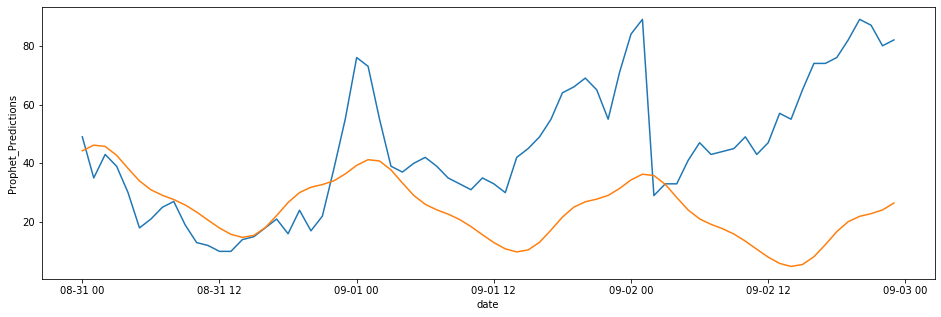

In [45]:
test_data["Prophet_Predictions"] = prophet_pred['Pred'].values
import seaborn as sns
plt.figure(figsize=(16,5))
ax = sns.lineplot(x= test_data.index, y=test_data["PM_US Post"])
sns.lineplot(x=test_data.index, y = test_data["Prophet_Predictions"]);

In [46]:
prophet_rmse_error = rmse(test_data['PM_US Post'], test_data["Prophet_Predictions"])
prophet_mse_error = prophet_rmse_error**2
mean_value = df['PM_US Post'].mean()

print(f'MSE Error: {prophet_mse_error}\nRMSE Error: {prophet_rmse_error}\nMean: {mean_value}')

MSE Error: 993.4103860495351
RMSE Error: 31.51841344435876
Mean: 56.76111111111111


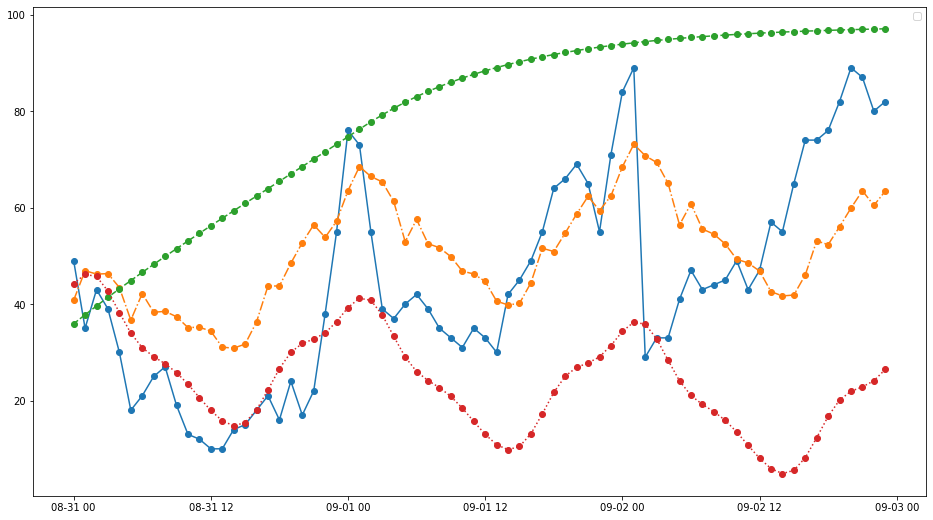

In [47]:
rmse_errors = [arima_rmse_error, lstm_rmse_error, prophet_rmse_error]
mse_errors = [arima_mse_error, lstm_mse_error, prophet_mse_error]
errors = pd.DataFrame({"Models" : ["ARIMA", "LSTM", "Prophet"],"RMSE Errors" : rmse_errors, "MSE Errors" : mse_errors})
plt.figure(figsize=(16,9))
plt.plot_date(test_data.index, test_data["PM_US Post"], linestyle="-")
plt.plot_date(test_data.index, test_data["ARIMA_Predictions"], linestyle="-.")
plt.plot_date(test_data.index, test_data["LSTM_Predictions"], linestyle="--")
plt.plot_date(test_data.index, test_data["Prophet_Predictions"], linestyle=":")
plt.legend()
plt.show()

In [48]:
print(f"Mean: {test_data['PM_US Post'].mean()}")
errors

Mean: 44.69444444444444


,Models,RMSE Errors,MSE Errors
0,ARIMA,18.360983,337.125699
1,LSTM,38.937133,1516.100344
2,Prophet,31.518413,993.410386


In [49]:
test_data.head(50)

,PM_US Post,ARIMA_Predictions,LSTM_Predictions,Prophet_Predictions
date,,,,
2013-08-31 00:00:00,49.0,40.806679,35.921120,44.236505
2013-08-31 01:00:00,35.0,46.928226,37.794134,46.173547
2013-08-31 02:00:00,43.0,46.225034,39.623267,45.730566
2013-08-31 03:00:00,39.0,46.315351,41.412417,42.708229
2013-08-31 04:00:00,30.0,43.434087,43.165195,38.249431
2013-08-31 05:00:00,18.0,36.684632,44.884966,33.990432
2013-08-31 06:00:00,21.0,42.197158,46.574885,30.963215
2013-08-31 07:00:00,25.0,38.309439,48.237900,29.106692
2013-08-31 08:00:00,27.0,38.494714,49.876793,27.637609
